In [130]:
#Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Crude Oil Prices

In [131]:
#Reading of the file for WTI and Bret Crude Oil prices per week

df_wti_bret = pd.read_excel("PET_PRI_SPT_S1_W.xls", sheet_name='Data 1', header=2)

column_name_mapping_wti_bret= { 'Weekly Cushing, OK WTI Spot Price FOB  (Dollars per Barrel)':'Weekly_WTI_Price',
                       'Weekly Europe Brent Spot Price FOB  (Dollars per Barrel)':'Weekly_Brent_Price'}
df_wti_bret.rename(columns=column_name_mapping_wti_bret, inplace=True) 


print(df_wti_bret.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1984 non-null   datetime64[ns]
 1   Weekly_WTI_Price    1984 non-null   float64       
 2   Weekly_Brent_Price  1913 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 46.6 KB
None


In [132]:
#Reading of the file for OPEC Crude Oil price per week

df_opec = pd.read_excel("OPEC_prices.xls")
column_name_mapping_opec= { 'data':'Date','val':'Weekly_OPEC_Price'}
df_opec.rename(columns=column_name_mapping_opec, inplace=True) 


print(df_opec.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               5438 non-null   datetime64[ns]
 1   Weekly_OPEC_Price  5438 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.1 KB
None


In [133]:
# Left join on the 'Date' column to add the OPEC prices into the Prices dataframe
df_oil_prices= pd.merge(df_wti_bret, df_opec, on='Date', how='left')
print(df_oil_prices)

           Date  Weekly_WTI_Price  Weekly_Brent_Price  Weekly_OPEC_Price
0    1986-01-03             25.78                 NaN                NaN
1    1986-01-10             25.99                 NaN                NaN
2    1986-01-17             24.57                 NaN                NaN
3    1986-01-24             20.31                 NaN                NaN
4    1986-01-31             19.69                 NaN                NaN
...         ...               ...                 ...                ...
1979 2023-12-08             70.71               75.98              77.42
1980 2023-12-15             70.11               75.58              78.03
1981 2023-12-22             73.23               80.15              81.23
1982 2023-12-29             73.52               79.23              78.44
1983 2024-01-05             72.49               76.88              78.91

[1984 rows x 4 columns]


Production stock for crude oil

In [134]:
#Read the US Supply file 
df_supply = pd.read_excel("psw01.xls", sheet_name='Data 1', header=2, usecols=[0, 1])
column_name_mapping_supply={'Weekly U.S. Ending Stocks of Crude Oil  (Thousand Barrels)':'US_Stocks_Crude_Oil_(Thousand Barrels)'}
df_supply.rename(columns=column_name_mapping_supply, inplace=True)

print(df_supply.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    2154 non-null   datetime64[ns]
 1   US_Stocks_Crude_Oil_(Thousand Barrels)  2154 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 33.8 KB
None


ANALYSIS OF CRUDE OIL PRICES AND PRODUCTION

In [135]:
# Join between crude oil prices and production 
df_main_prices_prd= pd.merge(df_oil_prices, df_supply, on='Date', how='left')
print(df_main_prices_prd)

           Date  Weekly_WTI_Price  Weekly_Brent_Price  Weekly_OPEC_Price  \
0    1986-01-03             25.78                 NaN                NaN   
1    1986-01-10             25.99                 NaN                NaN   
2    1986-01-17             24.57                 NaN                NaN   
3    1986-01-24             20.31                 NaN                NaN   
4    1986-01-31             19.69                 NaN                NaN   
...         ...               ...                 ...                ...   
1979 2023-12-08             70.71               75.98              77.42   
1980 2023-12-15             70.11               75.58              78.03   
1981 2023-12-22             73.23               80.15              81.23   
1982 2023-12-29             73.52               79.23              78.44   
1983 2024-01-05             72.49               76.88              78.91   

      US_Stocks_Crude_Oil_(Thousand Barrels)  
0                                     79

In [136]:
#Filtering the period to analyze
df_analysis = df_main_prices_prd[(df_main_prices_prd['Date']>='2020-01-01') & (df_main_prices_prd['Date']<='2023-12-31')]
df_analysis

,Date,Weekly_WTI_Price,Weekly_Brent_Price,Weekly_OPEC_Price,US_Stocks_Crude_Oil_(Thousand Barrels)
1774,2020-01-03,62.09,68.07,69.38,1066027
1775,2020-01-10,60.84,67.93,67.02,1063478
1776,2020-01-17,58.29,64.11,65.58,1063073
1777,2020-01-24,56.15,62.20,62.52,1066621
1778,2020-01-31,52.70,58.57,58.94,1069976
...,...,...,...,...,...
1978,2023-12-01,75.49,80.91,82.54,796948
1979,2023-12-08,70.71,75.98,77.42,792684
1980,2023-12-15,70.11,75.58,78.03,796222
1981,2023-12-22,73.23,80.15,81.23,789901


<Axes: >

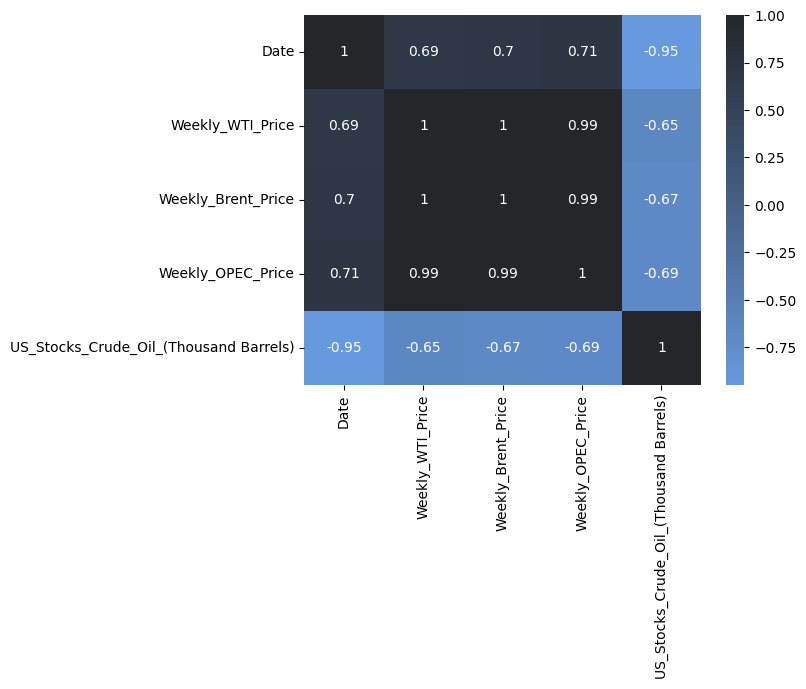

In [137]:
# Correlation between variables 
sns.heatmap(df_analysis.corr(),cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True), annot=True)


In [138]:
#Average of prices the last 10 years

baseline = np.linspace(1,1,len(df_analysis))
df_avg = df_main_prices_prd[(df_main_prices_prd['Date']>='2013-01-01') & (df_main_prices_prd['Date']<='2023-12-31')]


avg_WTI = df_avg['Weekly_WTI_Price'].mean() 
avg_WTI = baseline * avg_WTI

avg_Brent = df_avg['Weekly_Brent_Price'].mean()
avg_Brent = baseline * avg_Brent

avg_Opec = df_avg['Weekly_OPEC_Price'].mean()
avg_Opec = baseline * avg_Opec

#Average of production the last 10 years
avg_Prd = df_avg['US_Stocks_Crude_Oil_(Thousand Barrels)'].mean() 
avg_Prd = baseline * avg_Prd


print(avg_WTI[:5])
print(avg_Brent[:5])
print(avg_Opec[:5])
print(avg_Prd[:5])


[66.86489547 66.86489547 66.86489547 66.86489547 66.86489547]
[71.7166899 71.7166899 71.7166899 71.7166899 71.7166899]
[70.39479428 70.39479428 70.39479428 70.39479428 70.39479428]
[1060435.41811847 1060435.41811847 1060435.41811847 1060435.41811847
 1060435.41811847]


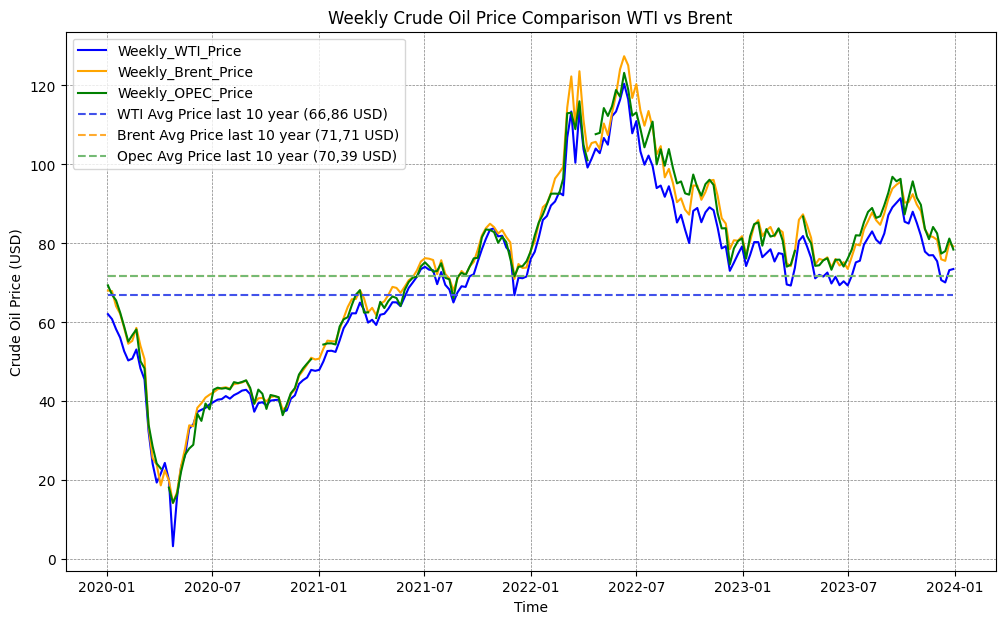

In [139]:
import matplotlib.pyplot as plt


# Plotting the prices values 
plt.figure(figsize=(12,7))
plt.plot(df_analysis['Date'],df_analysis['Weekly_WTI_Price'],color='blue', label='Weekly_WTI_Price')
plt.plot(df_analysis['Date'],df_analysis['Weekly_Brent_Price'],color='orange', label='Weekly_Brent_Price')
plt.plot(df_analysis['Date'],df_analysis['Weekly_OPEC_Price'],color='green', label='Weekly_OPEC_Price')

plt.plot(df_analysis['Date'],avg_WTI,color='#4252EA',linestyle = '--', label='WTI Avg Price last 10 year (66,86 USD)')
plt.plot(df_analysis['Date'],avg_Brent,color='#FFAB2F',linestyle = '--', label='Brent Avg Price last 10 year (71,71 USD)')
plt.plot(df_analysis['Date'],avg_Brent,color='#74BA74',linestyle = '--', label='Opec Avg Price last 10 year (70,39 USD)')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.xlabel('Time')
plt.ylabel('Crude Oil Price (USD)')
plt.grid(True)
plt.title('Weekly Crude Oil Price Comparison WTI vs Brent')
plt.legend()
plt.show()



Text(2020-04-24 00:00:00, 6.32, 'Minimum: (2020-04-24, 3.32 USD)')

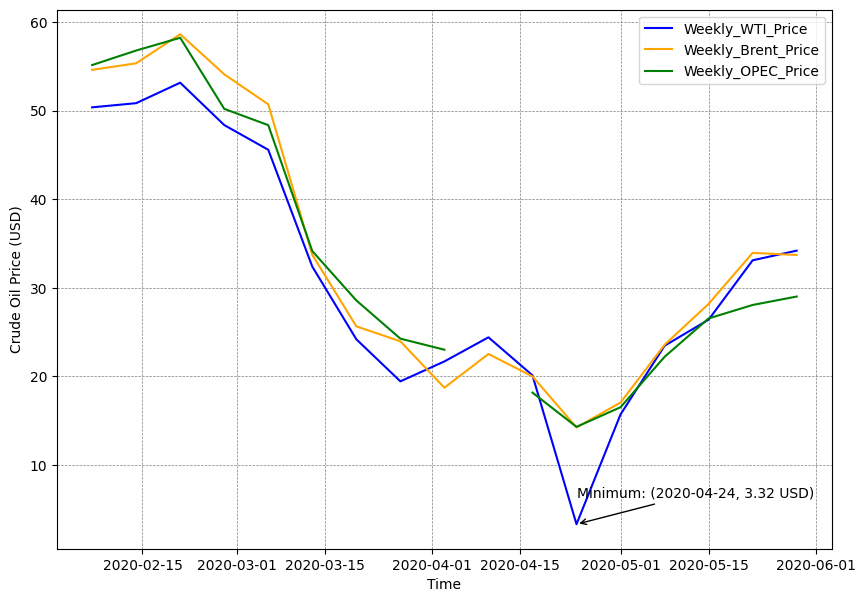

In [145]:
#Analysis of the event1 (COVID)
event1 = df_analysis[(df_analysis['Date']>='2020-02-01') & (df_analysis['Date']<='2020-05-31')]

# Plotting the values 
plt.figure(figsize=(10,7))
plt.plot(event1['Date'],event1['Weekly_WTI_Price'],color='blue', label='Weekly_WTI_Price')
plt.plot(event1['Date'],event1['Weekly_Brent_Price'],color='orange', label='Weekly_Brent_Price')
plt.plot(event1['Date'],event1['Weekly_OPEC_Price'],color='green', label='Weekly_OPEC_Price')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Time')
plt.ylabel('Crude Oil Price (USD)')
plt.legend()

# Find the lowest point
x = event1['Date']
y = event1['Weekly_WTI_Price']

# Finding the coordinates
min_index = y.idxmin()
min_x = x[min_index]
min_y = y[min_index]


# Plot the lowest price
formatted_min_x = min_x.strftime('%Y-%m-%d')
plt.annotate(f'Minimum: ({formatted_min_x}, {min_y} USD)', 
             xy=(min_x, min_y), xytext=(min_x, min_y + 3),
             arrowprops=dict(facecolor='red', arrowstyle='->'))


Text(2022-06-10 00:00:00, 130.4, 'Maximum: (2022-06-10, 127.4 USD)')

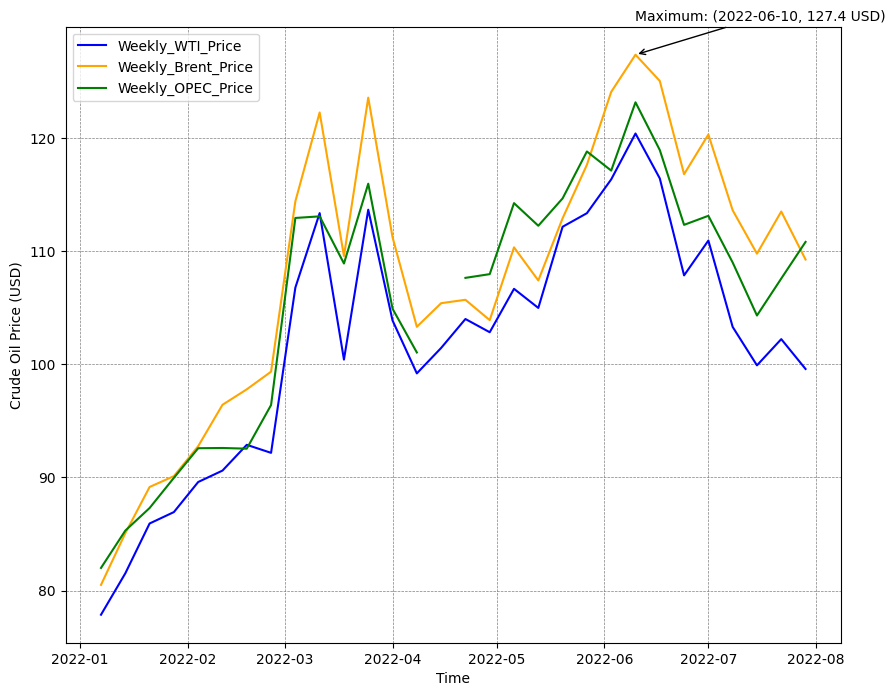

In [156]:
#Analysis of the event2 
event2 = df_analysis[(df_analysis['Date']>='2022-01-01') & (df_analysis['Date']<='2022-07-31')]

# Plotting the values 
plt.figure(figsize=(10,8))
plt.plot(event2['Date'],event2['Weekly_WTI_Price'],color='blue', label='Weekly_WTI_Price')
plt.plot(event2['Date'],event2['Weekly_Brent_Price'],color='orange', label='Weekly_Brent_Price')
plt.plot(event2['Date'],event2['Weekly_OPEC_Price'],color='green', label='Weekly_OPEC_Price')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Time')
plt.ylabel('Crude Oil Price (USD)')
plt.legend()

# Find the lowest point
x = event2['Date']
y = event2['Weekly_Brent_Price']

# Finding the coordinates
max_index = y.idxmax()
max_x = x[max_index]
max_y = y[max_index]


# Plot the lowest price
formatted_max_x = max_x.strftime('%Y-%m-%d')
plt.annotate(f'Maximum: ({formatted_max_x}, {max_y} USD)', 
             xy=(max_x, max_y), xytext=(max_x, max_y + 3),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

Text(2023-09-15 00:00:00, 99.87, 'Maximum: (2023-09-15, 96.87 USD)')

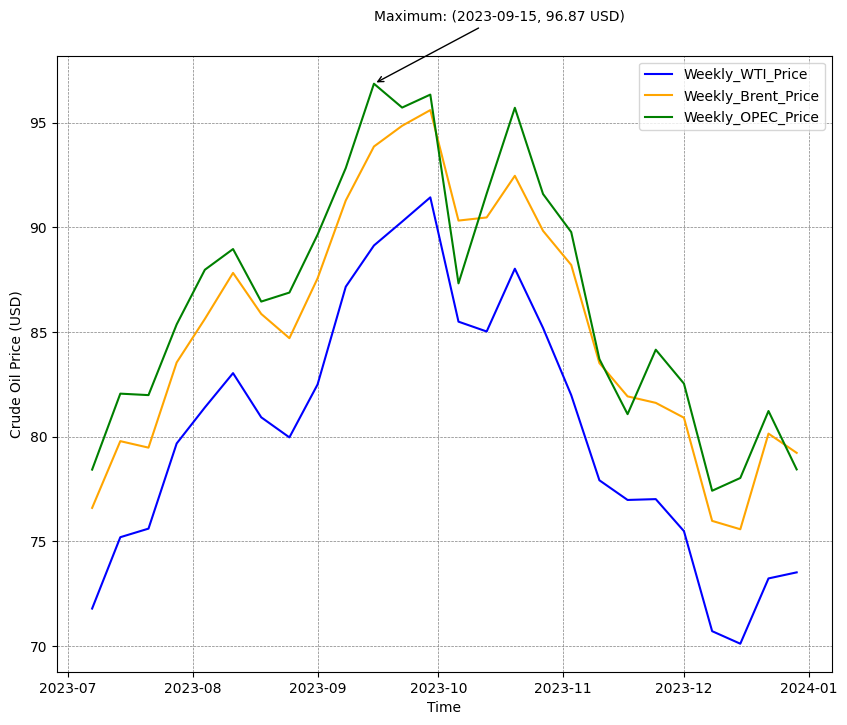

In [155]:
#Analysis of the event3 
event3 = df_analysis[(df_analysis['Date']>='2023-07-01') & (df_analysis['Date']<='2023-12-31')]

# Plotting the values 
plt.figure(figsize=(10,8))
plt.plot(event3['Date'],event3['Weekly_WTI_Price'],color='blue', label='Weekly_WTI_Price')
plt.plot(event3['Date'],event3['Weekly_Brent_Price'],color='orange', label='Weekly_Brent_Price')
plt.plot(event3['Date'],event3['Weekly_OPEC_Price'],color='green', label='Weekly_OPEC_Price')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Time')
plt.ylabel('Crude Oil Price (USD)')
plt.legend()

# Find the lowest point
x = event3['Date']
y = event3['Weekly_OPEC_Price']

# Finding the coordinates
max_index = y.idxmax()
max_x = x[max_index]
max_y = y[max_index]


# Plot the lowest price
formatted_max_x = max_x.strftime('%Y-%m-%d')
plt.annotate(f'Maximum: ({formatted_max_x}, {max_y} USD)', 
             xy=(max_x, max_y), xytext=(max_x, max_y + 3),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

Part 2 - Oil Production Analysis 


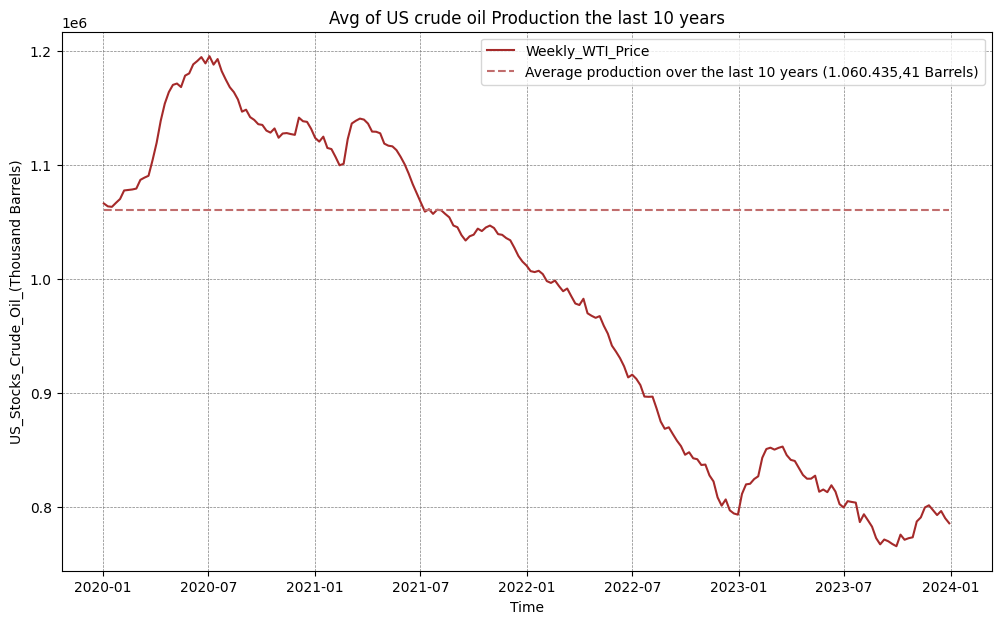

In [140]:
# Plotting the production values
plt.figure(figsize=(12,7))
plt.plot(df_analysis['Date'],df_analysis['US_Stocks_Crude_Oil_(Thousand Barrels)'],color='brown', label='Weekly_WTI_Price')

plt.plot(df_analysis['Date'],avg_Prd,color='#C16D6D',linestyle = '--', label='Average production over the last 10 years (1.060.435,41 Barrels)')


plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.xlabel('Time')
plt.ylabel('US_Stocks_Crude_Oil_(Thousand Barrels)')
plt.grid(True)
plt.title('Avg of US crude oil Production the last 10 years')
plt.legend()
plt.show()

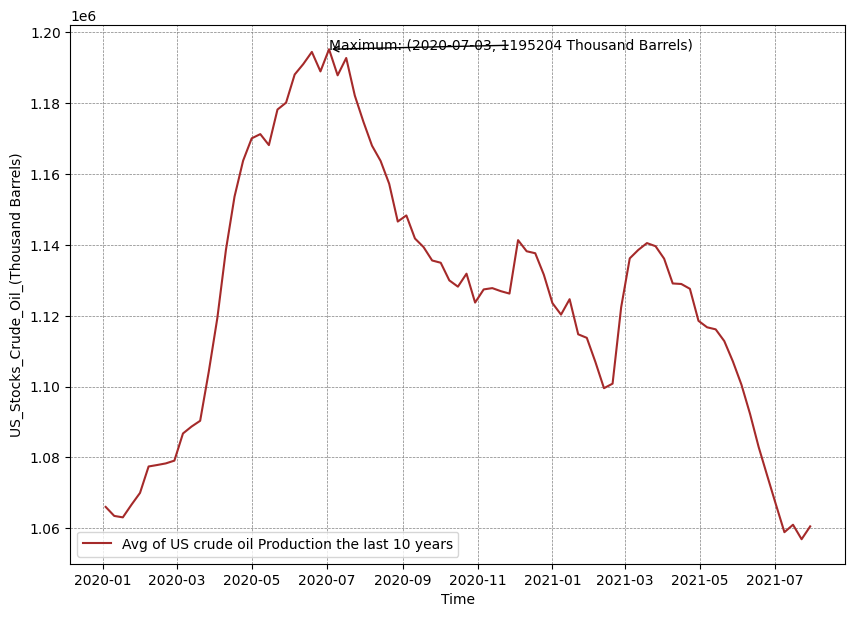

In [168]:
#Analysis of the event1 in the US oil production
#High Production
event_prd1 = df_analysis[(df_analysis['Date']>='2020-01-01') & (df_analysis['Date']<='2021-07-30')]

# Plotting the values 
plt.figure(figsize=(10,7))
plt.plot(event_prd1['Date'],event_prd1['US_Stocks_Crude_Oil_(Thousand Barrels)'],color='brown', label='Avg of US crude oil Production the last 10 years')



# Find the lowest point
x = event_prd1['Date']
y = event_prd1['US_Stocks_Crude_Oil_(Thousand Barrels)']

# Finding the coordinates
max_index = y.idxmax()
max_x = x[max_index]
max_y = y[max_index]


# Plot the lowest price
formatted_max_x = max_x.strftime('%Y-%m-%d')
plt.annotate(f'Maximum: ({formatted_max_x}, {max_y} Thousand Barrels)', 
             xy=(max_x, max_y), xytext=(max_x, max_y + 0.5),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Time')
plt.ylabel('US_Stocks_Crude_Oil_(Thousand Barrels)')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()




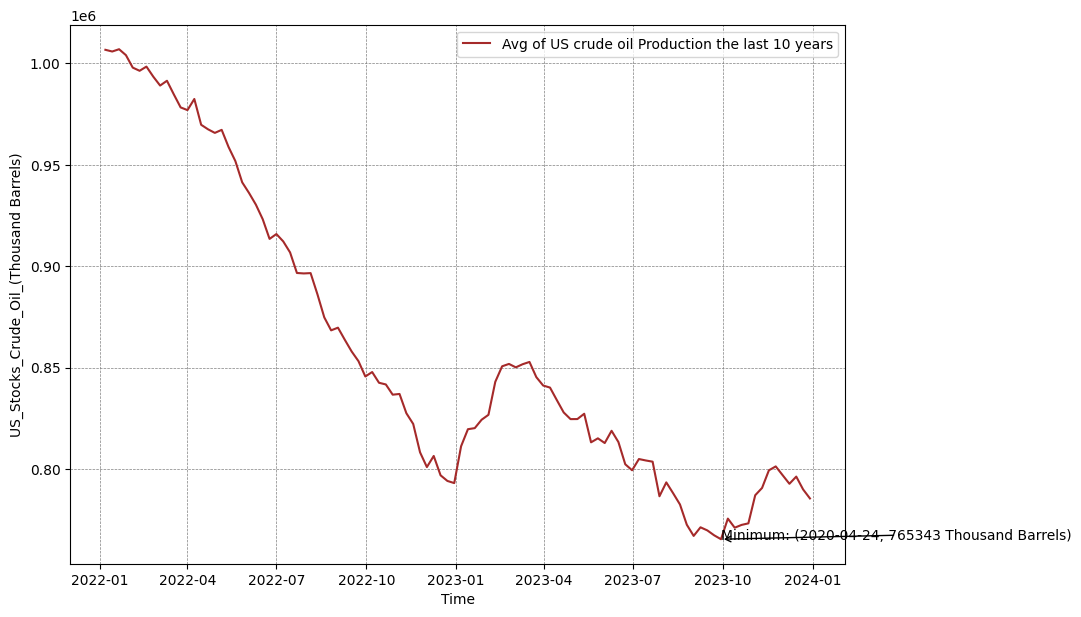

In [167]:
#Analysis of the event1 in the US oil production
#Low Production
event_prd2 = df_analysis[(df_analysis['Date']>='2022-01-01') & (df_analysis['Date']<='2024-01-01')]

# Plotting the values 
plt.figure(figsize=(10,7))
plt.plot(event_prd2['Date'],event_prd2['US_Stocks_Crude_Oil_(Thousand Barrels)'],color='brown', label='Avg of US crude oil Production the last 10 years')



# Find the lowest point
x = event_prd2['Date']
y = event_prd2['US_Stocks_Crude_Oil_(Thousand Barrels)']

# Finding the coordinates
min_index = y.idxmin()
min_x = x[min_index]
min_y = y[min_index]


# Plot the lowest price
formatted_minx_x = min_x.strftime('%Y-%m-%d')
plt.annotate(f'Minimum: ({formatted_min_x}, {min_y} Thousand Barrels)', 
             xy=(min_x, min_y), xytext=(min_x, min_y),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Time')
plt.ylabel('US_Stocks_Crude_Oil_(Thousand Barrels)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()